In [79]:
import numpy as np
import random
import matplotlib.pyplot as plt
import json
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [7]:
def run_experiment(n_die):
    """
    Runs the Experiment On An n_die sided die
    Returns the Number Of Rolls required to reduce to a single number
    """
    turns = 0
    all_die = [x for x in range(n_die)]
    while 1 != len(set(all_die)):
        all_die = [random.choice(all_die) for x in all_die]
        turns += 1
    return turns

In [8]:
def get_ev(n_die):
    distributions = [run_experiment(n_die) for x in range(20_000)]
    return np.mean(distributions)

In [ ]:
distributions = []
for i in range(2,1000):
    distributions.append(get_ev(i))
    with open('sampled/%s.json' % i, 'w') as fout:
        fout.write(json.dumps(distributions))

In [51]:
distributions = distributions[3:]

In [52]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [53]:
x = [x+2 for x in range(0, len(distributions))]
x = np.expand_dims(x, axis=1)

In [78]:
model.fit(x, distributions)
preds = model.predict(x)

In [77]:
print(model.coef_[0], model.intercept_)

1.9956410680751764 -2.782233939475219


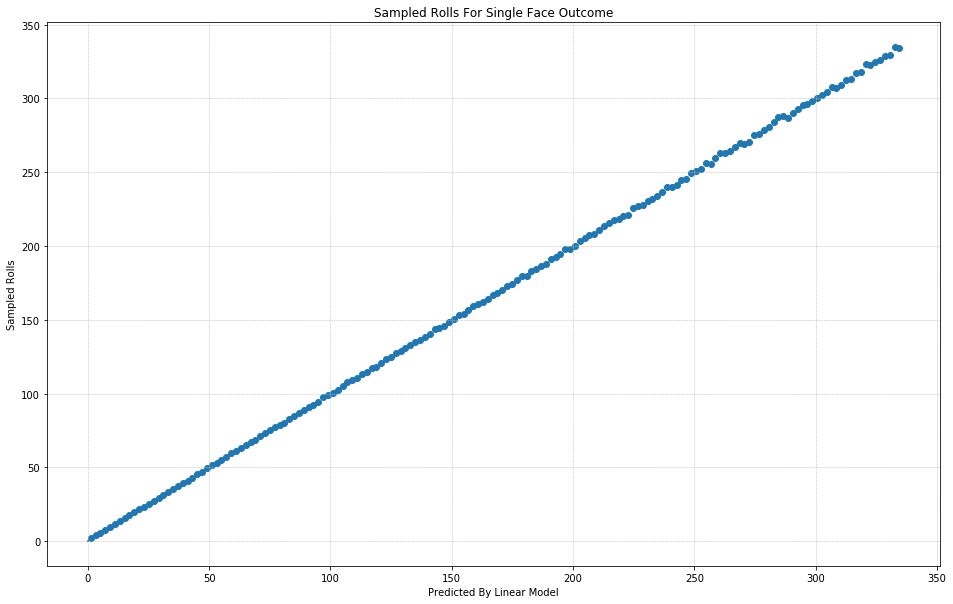

In [60]:
_GRID_LINE_PROPERTIES = dict(color='#bdbdbd', linestyle='--', linewidth=0.5)

plt.figure(figsize=(16,10))
plt.title("Sampled Rolls For Single Face Outcome")
plt.xlabel("Predicted By Linear Model")
plt.ylabel("Sampled Rolls")
plt.grid(**_GRID_LINE_PROPERTIES)
plt.scatter(preds, distributions)
plt.plot([0,38], [0,38])

In [61]:
mean_squared_error(distributions, preds)

0.6119870083124872

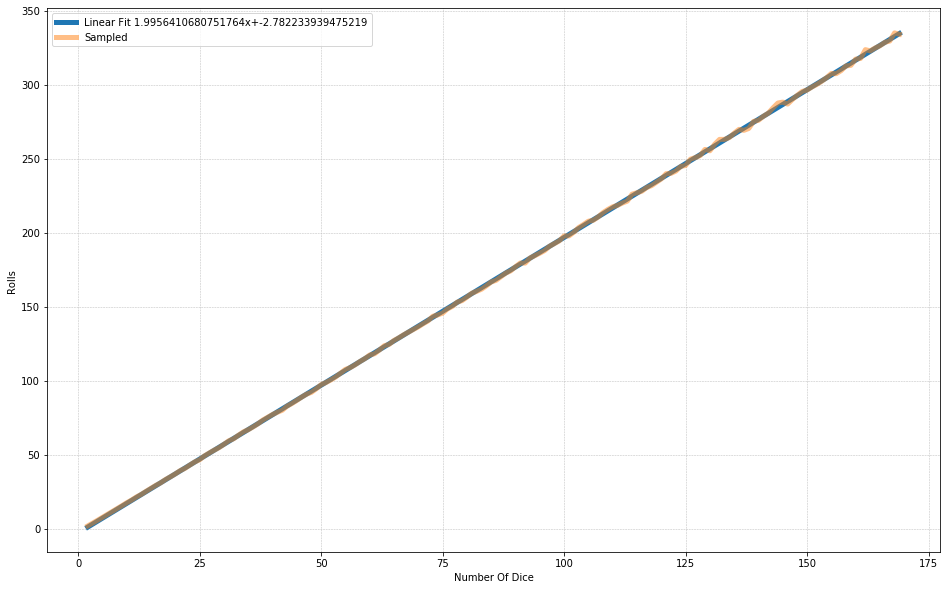

In [76]:
plt.figure(figsize=(16,10))
plt.plot(x, preds, linewidth=5)
plt.plot(x, distributions, linewidth=5, alpha=0.5)
plt.legend(['Linear Fit %sx+%s' % (model.coef_[0], model.intercept_), 'Sampled'])
plt.xlabel("Number Of Dice")
plt.ylabel("Rolls")
plt.grid(**_GRID_LINE_PROPERTIES)